# <center> Computational Homework 3</center>

In this notebook we look at some computational problems in probability theory and optimization. Throughout the notebook, vectors and matrices should always be represented as numpy arrays.

In [2]:
# run this cell to import needed modules
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import plotly
import plotly.graph_objects as go
import random, time
from collections import Counter

## Problem 1

In class we proved that if $J$ is twice differentiable, convex, and has $L$ - Lipshchitz continuous gradient, then for fixed step size $\alpha\leq \frac{1}{L}$ we have $$f(x_k)-f(x^*)\leq \frac{||x_0-x^*||_2^2}{2\alpha k}.$$

The goal of this problem is to verify this for linear regression. We will let gradient descent run for longer than one would ever need to in practice, to see how long it takes to reach the desired accuracy in approximating the global minimum. Copy the code from Homework 2 Problem 3 to complete the cell below. Now change the code as follows. First, we only want to print the cost once every 10000 iterations. 

We learned in class how to solve for the global minimum explicitly using 

$$v^* = (\hat{\mathbf{X}}^\top\hat{\mathbf{X}})^{-1}\hat{\mathbf{X}}^\top y$$

Change the stopping condition so that you stop once the cost is within a distance `epsilon` from the cost of the global minimum $v^*$. You can use `LA.inv` to compute the inverse in your computation of $v^*$. 

Run the two cells below (the 2nd defines a randomized dataset to test on). 

The markdown cell after provides additional instructions.

In [3]:
# to complete problem 1, fill in the following with your code
def J(X,y,v):
    ######################### your code goes here ########################
    m = X.shape[0]
    ones = np.ones((m,1))
    Xhat = np.concatenate((ones,X), axis = 1)
    return ((Xhat@v - y).T@(Xhat@v - y))[0,0]/m
    
def DJ(X,y,v):
    ######################### your code goes here ########################
    m = len(X)
    ones = np.ones((m,1))
    Xhat = np.concatenate((ones,X), axis = 1)
    return ((2*v.T@Xhat.T@Xhat - 2*y.T@Xhat).T)/m

def GD_linreg(X,y,alpha,epsilon,max_iters = 10000): 
    ######################### your code goes here ########################
    m = X.shape[0]
    ones = np.ones((m,1))
    Xhat = np.concatenate((ones,X), axis = 1)
    global_min = LA.inv(Xhat.T@Xhat)@Xhat.T@y
    stopping_cost = J(X,y,global_min)
    n = Xhat.shape[1]
    v = np.array([[0 for _ in range(n)]]).T
    i=0
    costs = []
    while True:
        costs.append(J(X,y,v))
        if i%10000==0:
            print(f'after {i} steps the cost is {costs[i]}')
        prev = v
        g = DJ(X,y,v)
        v = v - alpha*g
        if (abs(costs[i]-stopping_cost)<epsilon) or i>max_iters:
            break
        i+=1
    print(f'after {i} steps the cost is {costs[i]}')
    return v,costs

In [9]:
# Defining a dataset to test the model (no input needed)
X = np.random.normal(0, 500, size=(4000,2))
y = np.array([[np.random.normal(3,2)*point[0]+np.random.normal(4,2)*point[1]+np.random.normal(5,5)] for point in X])
Xhat = np.concatenate((np.ones((len(X),1)),X), axis = 1)

## Problem 1 Continued...

In theoretical homework 2 you found the $L$ for which $\nabla J$ is $L$-Lipschitz continuous. Compute this value of $L$ and save it to the variable `L`. You may use `LA.norm(MATRIX,2)` to compute the 2-norm which comes up in the formula. Compute the global minimum parameters $v^*$ and save it to a variable `global_min`, and the global minimum value $J(\mathbf{X},\mathbf{y},\mathbf{v}^*)$ of the cost function and set it to a variable `gmcost`. Set `alpha` to be equal to $\frac{1}{L}$. Set the value of `epsilon` to be the global minimum cost times `1e-7`. 

In [10]:
# compute L here (input needed)
L = LA.norm(Xhat.T@Xhat,2)*2/len(Xhat)
print(f'the gradient of J is L-Lipschitz continuous for L = {L}')

# compute the global minimum cost here (input needed)
global_min = LA.inv(Xhat.T@Xhat)@Xhat.T@y
gmcost = J(X,y,global_min)
print(f'the global minimum cost is {gmcost}')

# Tuning parameters (input needed for alpha, epsilon)
alpha = 1/L
print(f'the value of the step size alpha is {alpha}')
epsilon = gmcost*1e-7
print(f'the value of epsilon is {epsilon}')
max_iters = 2000000

the gradient of J is L-Lipschitz continuous for L = 507647.79951808735
the global minimum cost is 2022631.1413479152
the value of the step size alpha is 1.9698696634739778e-06
the value of epsilon is 0.2022631141347915


## Problem 1 Continued...

Then run the following cell to run gradient descent until desired convergence (it will take awhile... maybe three or four minutes). If this does not converge after 2 million iterations, you can the stopping condition parameter set previously from `1e-7` to `1e-6`. Run gradient descent and note the number of steps taken until stopping. 

In [11]:
# Run the gradient descent algorithm (no input needed)
v,costs = GD_linreg(X,y,alpha,epsilon,max_iters)
print('Using gradient descent, we have found the approximate global minimum:')
print(v)
# print the actual global minimum parameters
global_min = LA.inv(Xhat.T@Xhat)@Xhat.T@y
print('Solving analytically, we know the actual global minimum is at:')
print(global_min)

after 0 steps the cost is 8413331.363763578
after 10000 steps the cost is 2023246.0967007817
after 20000 steps the cost is 2023199.507022077
after 30000 steps the cost is 2023156.447027515


KeyboardInterrupt: 

## Problem 1 Continued...

In this problem we are stopping gradient descent when $f(x_k)-f(x^*)<\epsilon$. Using the fact that $$f(x_k)-f(x^*)\leq \frac{||x_0-x^*||_2^2}{2\alpha k}$$ compute the number of steps `k` needed until we are guaranteed to stop. Compute this in the code cell below and then explain in the markdown cell below whether this makes sense in the context of the previous step of this problem.

In [ ]:
# Compute the quantity k here
k = LA.norm(LA.inv(Xhat.T@Xhat)@Xhat.T@y)**2/(2*alpha*epsilon)
print(f'The maximum number of steps needed for convergence is {int(np.ceil(k))}')

## Explain the result here

Replace this text with your explanation...

# Problem 2

The goal of this problem is to implement regularized linear regression with polynomial terms up to degree `k`. Start by defining a function `generate_monomials_eq(n,k)` with inputs positive integers `n`,`k`, which outputs a list of all lists of length `n` whose entries are nonnegative integers that sum to `k`. Return this list sorted lexicographically bigger to smaller (the `sorted()` function can handle this with the argument `reverse = True`). I suggest doing this recursively (i.e. inside of the function `generate_monomials_eq(n,k)` call the function `generate_monomials_eq(n,k-1)` and then for each monomial in this list, add one to each component, giving you `n` new monomials of degree `k`. Add each of these to the list of monomials of degree `k` (unless it is already in the list). You'll need to program the base case where $k=0$ by hand.

Also define a function `generate_monomials_leq(n,k)` which gives the list of all lists of length `n` whose entries add up to a number between `0` and `k`. You should create this list by putting together results from `generate_monomials_eq(n,i)` for $0\leq i\leq k$.

Note: if you have a better way to implement both in a single function `generate_monomials_leq` you can do that as well, as long as the result is correct.

Running the following cell will test that you are getting the correct number of polynomial terms in some special cases.

In [4]:
# to complete problem 2, fill in the following with your code
def generate_monomials_eq(n,k):
    ######################### your code goes here ########################
    if k==0:
        return [[0 for _ in range(n)]]
    else:
        oldmons = generate_monomials_eq(n,k-1)
        newmons = []
        for mon in oldmons:
            for i in range(n):
                newmon = mon.copy()
                newmon[i]+=1
                if not (newmon in newmons):
                    newmons.append(newmon)
        return sorted(newmons, reverse = True)
    
def generate_monomials_leq(n,k):
    ######################### your code goes here ########################
    mons = []
    for i in range(k+1):
        mons.extend(generate_monomials_eq(n,i))
    return mons
    
#print(len(generate_monomials_leq(2,4))) #should be 15
#print(len(generate_monomials_leq(3,6))) #should be 84
#print(len(generate_monomials_leq(7,4))) #should be 330
#print(len(generate_monomials_leq(9,9))) #should be 48620 (should take about 25 seconds to compute)

15
84
330


KeyboardInterrupt: 

## Problem 2 Continued...

Define a function `add_poly_terms(X,k)` which adds columns to the dataset `X` corresponding to all polynomial terms up to total degree `k` (e.g. if `n==2` and `X` has two columns, you would have columns corresponding to $1,x_1,x_2,x_1^2, x_1x_2, x_2^2$). Hint: you can make a for loop over all of the monomials in `mons = generate_monomials_leq(n,k)` (i.e. `for mon in mons:`) and a for loop over the number of examples. You want to create matrix entries of the form `X[i,1]**mon[1] * X[i,2]**mon[2] * ... * X[i,n]**mon[n]` which can be accomplished with another loop.

Note: You do not need to concatenate columns to `X`. Instead, create a new array with a row for each polynomial term in `generate_monomials_leq(n,k)`. Since your `generate_monomials_leq` has terms corresponding to $1,x_1,x_2,\dots,x_n$, this will contain the old dataset, plus a bias term, plus all of the other higher order polynomial terms. Since you added these as rows (this is more natural in numpy) at the end you should return the transpose of the numpy array you created.

In [9]:
def add_poly_terms(X,k):
    m,n = X.shape
    mons = generate_monomials_leq(n,k)
    #print(mons)
    rows = []
    for mon in mons:
        row = []
        for i in range(m):
            entry = 1
            for j in range(n):
                entry*=X[i,j]**mon[j]
            row.append(entry)
        rows.append(row)
    return np.array(rows).T

In [5]:
X = np.array([[2,2],[0,1],[1,1],[2,4]])
Xhat = add_poly_terms(X,2)
print('the original matrix X:')
print(X)
print('the matrix X with polynomial terms up to degree 2')
print(Xhat)

NameError: name 'add_poly_terms' is not defined

## Problem 2 Continued...

Copy your code from Computational Homework 2 Problem 3 (just `J` and `DJ`) and Homework 2 Problem 4 (use the improved gradient descent using the Hessian) into the cell below. Make the following changes: 

 - get rid of portion of code that concatenates a column of 1's on the left (our `add_poly_terms` function includes the bias term automatically)
 - add an argument `lambda_` to `J` (at the end), `DJ` (at the end) and `GD_linreg_improved` (before `max_iters`)
 - add a regularization term
 - modify the `DJ` function accordingly to account for the regularization term
 - modify the Hessian to account for the regularization term
 - print the cost every 1000 steps

In [6]:
def J(X,y,v,lambda_):
    ######################### your code goes here ########################
    m = X.shape[0]
    return ((X@v - y).T@(X@v - y))[0,0]/m + lambda_*(v.T@v)[0,0]
    
def DJ(X,y,v,lambda_):
    ######################### your code goes here ########################
    m = len(X)
    return 2/m*(X.T@X@v - X.T@y) + lambda_ * 2 * v

def GD_linreg_improved(X,y,epsilon,lambda_,max_iters = 1000000): 
    ######################### your code goes here ########################
    m,n = X.shape
    v = np.array([[0 for _ in range(n)]]).T
    i=0
    costs = []
    while True:
        costs.append(J(X,y,v,lambda_))
        if i%1000==0:
            print(f'after {i} steps the cost is {costs[i]}')
        H = (2*X.T@X+2*lambda_*np.identity(n))/m
        g = DJ(X,y,v,lambda_)
        alpha = g.T@g/(g.T@H@g)
        v = v - alpha*g
        if (i>100 and abs(costs[i]-costs[i-100])<epsilon) or i>max_iters:
            break
        i+=1
    print(f'after {i} steps the cost is {costs[i]}')
    return v,costs

In [10]:
# Defining a dataset to test the model (no input needed)
points = []
points_val = []
points_test = []
for i in range(-3,3):
    for j in range(-3,3):
        points.append([i+np.random.normal(0,.5),j+np.random.normal(0,.5)])
        points_val.append([i+np.random.normal(0,.5),j+np.random.normal(0,.5)])
        points_test.append([i+np.random.normal(0,.5),j+np.random.normal(0,.5)])
X = np.array(points)
def p_data(p):
    return 5*p[0]**2 - p[1]**3 + np.random.normal(0,2)
y = np.array([[p_data(p)] for p in X])
X_val = np.array(points_val)
y_val = np.array([[p_data(p)] for p in X_val])
X_test = np.array(points_test)
y_test = np.array([[p_data(p)] for p in X_test])
# plotting training set
plot_figure = go.Figure(data=[go.Scatter3d(x=X[:,0], y=X[:,1], z=[r[0] for r in y], mode='markers',marker=dict(size=5))])
plotly.offline.iplot(plot_figure)

## Problem 2 Continued...

Next we run our gradient descent algorithm. First run the following 5 cells with `lambda_ = 0` and observe how the model performs. Adjust the value of `lambda_` until you find a good fit (not overfit, not underfit). This can be determined by comparing training set performance, validation set performance, and test set performance by following the procedure explained in lecture. Explain in the markdown cell at the end the relationship between the values of `degree` and of `lambda_` and whether the model overfits or underfits. Things to consider: 

 - Experiment with different values of `lambda_` with the given `degree`. 
 - Now experiment with the `degree`. 
 - Can you find an optimal choice of both? 
 - Does the effect of `lambda` change based on your choice of `degree`?

In [42]:
# this by default fits a model without regularization (lambda_ = 0)
# INPUT NEEDED
# pick appropriate values for degree and lambda_ (can also change epsilon if needed)
epsilon = .01
degree = 5
lambda_ = 23
Xhat = add_poly_terms(X,degree)
print(f'number of features in Xhat: {Xhat.shape[1]}')
v,costs = GD_linreg_improved(Xhat,y,epsilon,lambda_)
print(f'unregularized cost on training set: {J(Xhat,y,v,0)}')
# Computing the validation set error (no input needed)
Xhat_val = add_poly_terms(X_val,degree)
print(f'unregularized cost on validation set: {J(Xhat_val,y_val,v,0)}')

number of features in Xhat: 21
after 0 steps the cost is 885.7207078085747
after 1000 steps the cost is 38.50827389445588
after 1281 steps the cost is 38.46380834713884
unregularized cost on training set: 26.3031951421324
unregularized cost on validation set: 68.67962820164017


In [43]:
# Computing the test set error (no input needed)
Xhat_test = add_poly_terms(X_test,degree)
print(f'unregularized cost on test set: {J(Xhat_test,y_test,v,0)}')

unregularized cost on test set: 81.81456820427704


In [44]:
# See how well your result fits the training set (no input needed)
zz = [r[0] for r in y]
trace = go.Scatter3d(x=Xhat[:,1], y=Xhat[:,2], z=zz, mode='markers',marker=dict(size=5))
xs,ys = Xhat[:,1],Xhat[:,2]
xxx = np.outer(np.linspace(min(xs), max(xs), 30), np.ones(30))
yyy = np.outer(np.linspace(min(ys), max(ys), 30), np.ones(30)).T
zzz = 0
mons = generate_monomials_leq(X.shape[1],degree)
i=0
for mon in mons:
    zzz +=  v[i]*xxx**(mon[0])*yyy**(mon[1])
    i+=1

# Configure the layout.
layout = go.Layout(margin={'l': 0, 'r': 0, 'b': 0, 't': 0})
data = [trace,go.Surface(x=xxx, y=yyy, z=zzz, showscale=False, opacity=0.5)]
# Render the plot.
plot_figure = go.Figure(data=data, layout=layout)
plot_figure.update_layout(
    scene = dict(
        xaxis = dict(nticks=4, range=[-4,4],),
                     yaxis = dict(nticks=4, range=[-4,4],),
                     zaxis = dict(nticks=4, range=[min(zz),max(zz)],),),
    width=700,
    margin=dict(r=20, l=10, b=10, t=10))
plotly.offline.iplot(plot_figure)

In [45]:
# See how well your result fits the test set (no input needed)
zz_test = [r[0] for r in y_test]
trace = go.Scatter3d(x=Xhat_test[:,1], y=Xhat_test[:,2], z=zz_test, mode='markers',marker=dict(size=5))
xs,ys = Xhat_test[:,1],Xhat_test[:,2]
xxx = np.outer(np.linspace(min(xs), max(xs), 30), np.ones(30))
yyy = np.outer(np.linspace(min(ys), max(ys), 30), np.ones(30)).T
zzz = 0
mons = generate_monomials_leq(X.shape[1],degree)
i=0
for mon in mons:
    zzz +=  v[i]*xxx**(mon[0])*yyy**(mon[1])
    i+=1
# Configure the layout.
layout = go.Layout(margin={'l': 0, 'r': 0, 'b': 0, 't': 0})
data = [trace,go.Surface(x=xxx, y=yyy, z=zzz, showscale=False, opacity=0.5)]
# Render the plot.
plot_figure = go.Figure(data=data, layout=layout)
plot_figure.update_layout(
    scene = dict(
        xaxis = dict(nticks=4, range=[-4,4],),
                     yaxis = dict(nticks=4, range=[-4,4],),
                     zaxis = dict(nticks=4, range=[min(zz_test),max(zz_test)],),),
    width=700,
    margin=dict(r=20, l=10, b=10, t=10))
plotly.offline.iplot(plot_figure)

## Explain the result here

Replace this text with your explanation...

## Problem 3

In this problem our goal is to implement the Gaussian Naive Bayes Classification algorithm. We test it on handwritten digits. Recall, in naive Bayes, our goal is to find a maximum likelihood estimator for the following approximate conditional probability distribution:

$p(y=j|\vec{x}) = p(y=j)\prod_{i=1}^n p(x_i|y=j)$

Model $p(y)$ as a categorical distribution and $p(x_i|y=j)$ as a Gaussian as described in the lecture. Careful though, if the variance is computed to be 0, you can not use the Gaussian formula (you decide how to handle this). 

You are given a supervised learning dataset `X,y` where `X` is a 2-dimensional numpy array and `y` is a 1-dimensional numpy array. You will complete functions `p(j,X,y)` which models the distribution $p(y=j)$, a function `p_cond(x,i,j,X,y)` which models $p(x_i|y=j)$, and a function `bayes_prediction(x,X,y)` which returns the corresponding class prediction. The inputs are

- `x` an example which we can run prediction on (like a row of `X`)
- `i` a feature index (so `i` ranges from `0` to `X.shape[1]`)
- `j` a target label (so `j` takes any possible value one sees in the dataset `y`)
- `X` a matrix of examples
- `y` a vector of labels

In [23]:
# to complete problem 3, fill in the following with your code
def p(j,X,y): 
    ######################### your code goes here ########################
    return len([k for k in range(len(y)) if y[k]==j])/len(y)

def p_cond(x,i,j,X,y):
    ######################### your code goes here ########################
    filter_j = [k for k in range(len(y)) if y[k]==j]
    mi = len(filter_j)
    mean_i = sum([X[k][i] for k in filter_j])/mi
    var_i = sum([(X[k][i] - mean_i)**2 for k in filter_j])/mi
    if var_i == 0 and x==mean_i:
        return 1
    elif var_i == 0 and not (x==mean_i):
        return 0
    return 1/np.sqrt(2*np.pi*var_i)*np.exp(-(x-mean_i)**2/(2*var_i))
    
def bayes_prediction(x,X,y):
    ######################### your code goes here ########################
    predictions = []
    for j in range(max(y)+1):
        prob = p(j,X,y)
        for i in range(len(X[0])):
            prob *= p_cond(x[i],i,j,X,y)
        predictions.append(prob)
    return np.argmax(predictions)

## Test your model on the handwritten digit recognition problem

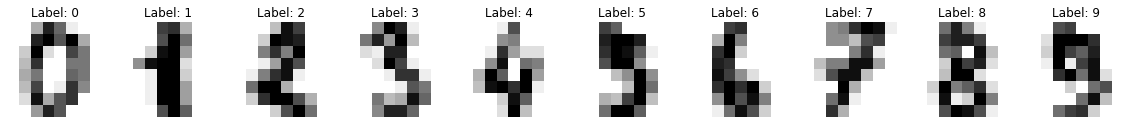

In [24]:
# no input needed
# run this cell to load images of digits 
# showing some examples of typical images in the dataset
from sklearn import datasets
digits = datasets.load_digits()
X,y = digits.data, digits.target
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(20, 10))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Label: %i" % label)

In [25]:
# (no input needed)
# using the bayes_prediction function to predict the digits
# you should get most correct
for i in range(20):
    pred = bayes_prediction(X[i,:],X,y)
    target = y[i]
    print(f'predicting: {pred}, true value: {target}')

predicting: 0, true value: 0
predicting: 1, true value: 1
predicting: 8, true value: 2
predicting: 3, true value: 3
predicting: 4, true value: 4
predicting: 9, true value: 5
predicting: 6, true value: 6
predicting: 7, true value: 7
predicting: 8, true value: 8
predicting: 9, true value: 9
predicting: 0, true value: 0
predicting: 1, true value: 1
predicting: 2, true value: 2
predicting: 3, true value: 3
predicting: 4, true value: 4
predicting: 5, true value: 5
predicting: 6, true value: 6
predicting: 7, true value: 7
predicting: 8, true value: 8
predicting: 3, true value: 9


In [34]:
# training set accuracy
# (no input needed)
test = len(X)
acc_train = 0
for i in range(test):
    pred = bayes_prediction(X[i,:],X,y)
    target = y[i]
    if pred==target:
        acc_train+=1/test
acc_train

0.9154145798552902

## Step 4: Check your own handwritten digits

Get a piece of paper and a pen. Write down four digits of your choice, preferably legibly. Take pictures of each digit, and crop them to nearly square and tightly centered windows around the digit. Move the image files (preferably as `.jpg` files) to the same folder on your computer which contains this notebook. Save them as `a.jpg`, `b.jpg`, `c.jpg`, `d.jpg`. Use the following to check how the model classifies them. Make sure to change `r` to the optimal value found in the previous step.

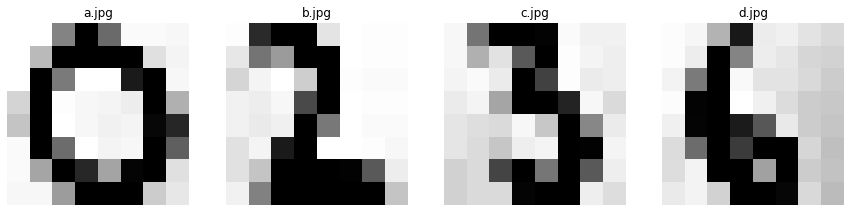

In [23]:
# before running, make sure you have files a.jpg, b.jpg, c.jpg, d.jpg in the folder containing this notebook
# check: you should see the converted images of your files plotted below
from PIL import Image, ImageEnhance # importing some packages to handle images
from matplotlib import image
digit_images, digit_arrays = {}, {}
for i in ['a','b','c','d']: #for each i this converts the image to an 8 by 8 matrix with values from 0 to 16
    digit_image = Image.open(f"{i}.jpg") # opening your image
    digit_image = digit_image.resize((8,8)) # resize to 8 by 8 pixels
    digit_image = ImageEnhance.Contrast(digit_image).enhance(10).convert('LA') # preprocess (contrast & grayscale)
    digit_images[i] = digit_image
    digit_arr = np.asarray(digit_images[i])[:,:,0] # create as 3-tensor but only need 0 slice matrix
    digit_arr = (255 - digit_arr) # had opposite grayscale convention, need to correct it
    digit_arr = digit_arr/255*16 # had entries up to 255 but we only want it up to 16 
    digit_arr = np.rint(digit_arr-3) # rounding to integer values
    digit_arr = digit_arr.clip(min = 0) # attempting to get rid of background darkness
    digit_arrays[i] = digit_arr
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 10))
for ax, image, label in zip(axes, digit_images.values(), digit_images.keys()):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"{label}.jpg")

In [24]:
# check: seeing if your model reads the digits correctly
for i in ['a','b','c','d']:
    x = np.reshape(digit_arrays[i],64)
    prediction = bayes_prediction(x,X,y)
    print(f'predicted digit for {i}.jpg with Naive Bayes: {prediction}')

predicted digit for a.jpg with Naive Bayes: 0
predicted digit for b.jpg with Naive Bayes: 2
predicted digit for c.jpg with Naive Bayes: 3
predicted digit for d.jpg with Naive Bayes: 0


In [ ]:
# Accuracy
